# Introduction to Linear Regression


## Motivation

Why are we learning linear regression?
- Widely used
- Easy to use (not a lot of tuning required)
- Highly interpretable
- Basis for many other methods

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

\begin{equation*}
y = mx + c
\end{equation*}



What does each term represent?
- $y$ is the dependent variables
- $x$ is the feature/independent variable
- m is the coefficient for or slope of the line
- c is the intercept

![linear_graph](images/linear_graph.gif)

Together, m and c are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict

### Hypothesis function

\begin{equation*}
h_\theta(x) = \theta_0 + \theta_1 x
\end{equation*}

![linear_graph2](images/linear_graph2.jpg)

So we have to find $\theta_0$ and $\theta_1$ so that we can get the best line for our training set such that $h_\theta(x)$ is close to y (actual values). This means we have to **minimize** the error between actual values (y) and predicted values($h_\theta(x)$)

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="images/08_estimating_coefficients2.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

From a mathematical point of view, for each $i^{th}$ point in my data set, the difference $(h_\theta(x^\left(i \right)) - y^\left(i \right))$ is very small. Here  $h_\theta(x^\left(i \right)$ is the prediction of the hypothesis when it is input the size of house number i, while $y^\left(i \right)$ is the actual price of the house number i. If that difference is small, it means that the hypothesis has made an accurate prediction, because it's similar to the actual data.

\begin{equation*}
Error = \sum_{i=1}^m \left (h_\theta(x^\left(i \right)) - y^\left(i \right)) \right)
\end{equation*}

#### Cost function

\begin{equation*}
J(\theta) = \frac{1}{2m}\sum_{i=1}^m \left (h_\theta(x^\left(i \right)) - y^\left(i \right)) \right)^2
\end{equation*}

$J(θ)$ is called the cost function. The above function is called mean squared error function (MSE), a function that does exactly what we want: it measures how close a fitted line is to some data points. The smaller the MSE, the closer the fit is to the data. Actually there are many other functions that work well for such task, but the MSE is the most commonly used one for regression problems.<br>

Note the $\frac{1}{2m}$ and the summation part: we are properly computing a mean. That 2 at the denominator will ease some calculations in future steps. Also, the squaring is done so negative values do not cancel positive values.

Now, we want to find values of $θ_0$ and $θ_1$, so good that the above cost function can produce the best possible values, namely the smallest ones (because small values mean less errors). This is an optimization problem: the problem of finding the best solution from all feasible solutions. It can be written as

**Find $θ_0$,$θ_1$ that minimizes $J$($θ_0$,$θ_1$)**

To minimize $J$($θ_0$,$θ_1$) and find optimal values of $θ_0$ and $θ_1$, we use an algorithm called **Gradient descent**. It minimizes our cost function.

![gradient_descent](images/grad_descent.jpg)

![grad_descent2](images/grad_descent2.jpg)

### Learning rate α
We use learning rate α to control how much we update at one iteration. If α is too small, it makes the gradient descent update too slow, whereas the update may overshoot the minimum and won’t converge.<br>

Note that we set a fixed learning rate α in the beginning since the gradient descent will update slowly and automatically until it reaches the minimum. Hence, there is no need to change the learning rate α at each iteration by ourselves.

![learning_rate](images/learning_rate.png)

### 3 Dimensional cost function

![error_plot](images/error_plot.jpg)

![grad_descent3](images/grad_descent3.png)

In [18]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [19]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv')
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [20]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

In [21]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

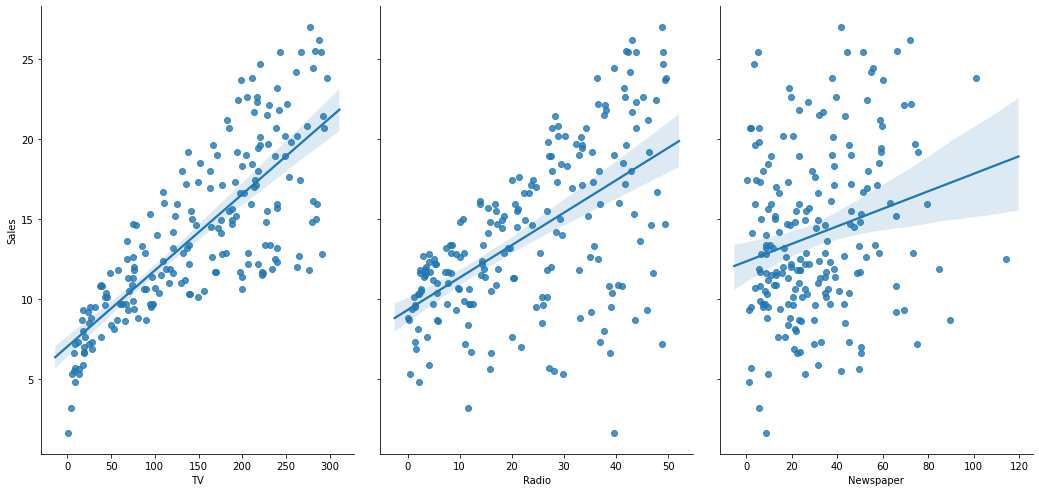

In [22]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Libraries

I will be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling.

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

In [23]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

In [24]:
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [25]:
# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

In [29]:
#h(x) = 7.032594 + 0.0475x

In [30]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [31]:
# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data,).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [32]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [33]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [34]:
lm.predict(X_new)

0    9.409426
dtype: float64

In [35]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [36]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [37]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

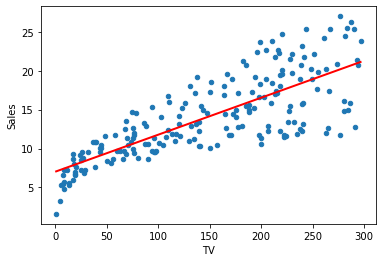

In [38]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

![bias_variance](images/bias_variance.jpg)

![fitting](images/fitting.png)

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

![r_square](images/r_square.png)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="images/08_r_squared.png">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [39]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [40]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [43]:
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [44]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [45]:
# print a summary of the fitted model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 22 May 2020   Prob (F-statistic):           1.58e-96
Time:                        13:43:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [47]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.rsquared

0.611875050850071

In [48]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [49]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

In [50]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.rsquared_adj

0.6099148238341623

In [51]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared_adj

0.8961505479974428

In [52]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared_adj

0.8956373316204668

## Linear regression in scikit-learn

### Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [53]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

In [54]:
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [55]:
# use the list to select a subset of the original DataFrame
X = data[feature_cols]
X.head(3)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [56]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [57]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [58]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [61]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)

In [75]:
X_train.shape

(140, 3)

In [76]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


## Training model using Gradeint descent based Linear regression

In [77]:
#import model

from sklearn.linear_model import SGDRegressor

In [191]:
sgdreg = SGDRegressor(tol=1e-3,penalty=None, eta0 = 0.001)

In [78]:
sgdreg = SGDRegressor(penalty=None, eta0 = 0.000001,tol=1e-4,random_state = 123)

# fit the model to the training data (learn the coefficients)
sgdreg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=1e-06,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
       power_t=0.25, random_state=123, shuffle=True, tol=0.0001, verbose=0,
       warm_start=False)

### Interpreting model coefficients

In [79]:
# print the intercept and coefficients
print(sgdreg.intercept_)
print(sgdreg.coef_)

[0.0061565]
[0.05586855 0.17765262 0.03937826]


In [80]:
# pair the feature names with the coefficients
list(zip(feature_cols, sgdreg.coef_))

[('TV', 0.05586855424810982),
 ('Radio', 0.17765261503230087),
 ('Newspaper', 0.03937826018579509)]

## Training model using OLS based Linear regression

In [81]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.9372157346906107
[0.04695205 0.17658644 0.00185115]


In [83]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04695204776848464),
 ('Radio', 0.1765864352681737),
 ('Newspaper', 0.0018511533188922402)]

$$y = 2.93 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making predictions

In [86]:
X_test.head(3)

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4


In [88]:
# make predictions on the testing set
y_pred_sgd = sgdreg.predict(X_test.values)
y_pred_lin = linreg.predict(X_test.values)

In [89]:
y_pred_sgd

array([22.07937785, 16.52554507,  5.89288993, 18.29751158, 19.15094407,
       25.91872914, 16.82642401, 14.32552975,  8.39955129, 18.50103259,
       14.77600286,  8.23476122, 16.4223109 , 16.65636133, 16.30289919,
       16.70297347, 11.99534101, 17.31023615,  8.7310613 , 17.38463084,
        7.46258619, 14.78525185,  7.67920808,  8.92279887, 10.92487262,
       14.75538791,  8.53959294, 19.62240082, 16.92820292, 17.2887572 ,
       21.510104  , 17.05062783, 14.93038173, 12.28678959, 20.04839303,
       14.93327882, 13.55119707,  9.48070687, 20.98849754,  5.34142815,
        1.81717907,  6.02354523,  4.1219464 , 19.06509943,  7.0362954 ,
       13.23361681, 14.0477698 , 20.70179478, 20.24315696, 21.48803607,
       25.7221492 , 13.51864644,  4.8105835 , 20.72680919, 18.40971029,
       11.72757261, 14.25172405,  4.52658345, 14.84365129,  7.8169614 ])

In [90]:
y_pred_lin

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [92]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [93]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [94]:
print(metrics.mean_absolute_error(y_test, y_pred_sgd))

1.6079614807622271


In [95]:
print(metrics.mean_absolute_error(y_test, y_pred_lin))

1.054832840507332


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [96]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [97]:
print(metrics.mean_squared_error(y_test, y_pred_sgd))

3.852488532743961


In [99]:
print(metrics.mean_squared_error(y_test, y_pred_lin))

1.9289249074665737


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [100]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [101]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_sgd)))

1.9627757214577424


In [102]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

1.3888574107756972


**Mean Absolute Percentage Error** (MAPE) is the mean of the absolute errors in percentages:

$$\frac 1n\sum_{i=1}^n\left|\frac{y_{true} - y_{pred}}{y_{true}}\right|$$

In [103]:
np.mean(np.abs((y_test - y_pred_sgd) / y_test)) * 100

14.108815499505317

In [104]:
np.mean(np.abs((y_test - y_pred_lin) / y_test)) * 100

8.545502795467277

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **MAPE** is widely used due to easier interpretation

## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [105]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

1.3879034699382888
8.725318159221404


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

Note that **p-values** and **confidence intervals** are not (easily) accessible through scikit-learn.

## What Didn't We Cover?

- Detecting collinearity
- Transforming predictors to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. However, we also want to spend time on many other machine learning models, which is why we aren't going deeper here.

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).

- Linear regression using OLS https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
https://www.youtube.com/watch?v=IyDwQNXDWns
